In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('day.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
X_train

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
223,224,2011-08-12,3,0,8,0,5,1,1,0.708333,0.654042,0.415000,0.125621,1051,3854
684,685,2012-11-15,4,1,11,0,4,1,2,0.321667,0.324492,0.620417,0.152987,320,5125
685,686,2012-11-16,4,1,11,0,5,1,1,0.345000,0.347204,0.524583,0.171025,484,5214
163,164,2011-06-13,2,0,6,0,1,1,1,0.635000,0.601654,0.494583,0.305350,863,4157
394,395,2012-01-30,1,1,1,0,1,1,1,0.269167,0.262625,0.400833,0.215792,126,3498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,2011-03-13,1,0,3,0,0,0,1,0.384348,0.380091,0.527391,0.270604,982,1435
106,107,2011-04-17,2,0,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496,1558,2186
270,271,2011-09-28,4,0,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,480,3427
435,436,2012-03-11,1,1,3,0,0,0,1,0.361739,0.359670,0.476957,0.222587,1658,3253


In [17]:
#we need to standardize data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train.drop('dteday', axis=1))

In [22]:
X_test = scaler.transform(X_test.drop('dteday', axis=1))

In [23]:
X_train

array([[-0.7000499 ,  0.44813519, -1.03789969, ..., -0.84294654,
         0.23845793,  0.11792085],
       [ 1.48608989,  1.353262  ,  0.96348424, ..., -0.48118902,
        -0.79986784,  0.94939794],
       [ 1.49083206,  1.353262  ,  0.96348424, ..., -0.24274051,
        -0.56691924,  1.00762096],
       ...,
       [-0.47716797,  1.353262  , -1.03789969, ..., -0.53879844,
        -0.57260091, -0.16141881],
       [ 0.30528987, -1.36211843,  0.96348424, ...,  0.43886957,
         1.10065184, -0.27524809],
       [-1.27385232, -0.45699162, -1.03789969, ...,  0.80940466,
        -0.95753427, -1.12569672]])

In [25]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [32]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [29]:
np.mean(mse)

np.float64(-6.026525683561134e-24)

In [33]:
reg_pred=regression.predict(X_test)

In [34]:
reg_pred

array([6606., 1550., 3747., 6041., 7538., 7264., 1605., 2209., 7499.,
       5743., 1796., 3068., 4891., 5260., 2133., 2471., 2046., 8156.,
       5362., 2298., 7697., 5463., 5409., 1872., 1807., 5130., 2121.,
       7436., 3830., 5557., 2743., 3644., 6196., 7494., 5918., 3372.,
       7582., 6053., 2566., 1263., 3944., 3956., 7580., 4906., 6966.,
        705., 4458., 5298., 6043., 4996., 3351., 2431., 1011., 4475.,
       4725., 4727., 2395., 3351., 4788., 7175., 6153., 7442., 1471.,
       7865., 6530., 6211., 7403., 4302., 2077., 7333., 3117., 1635.,
       3811., 4595., 4363., 2034., 5686., 4748., 1416., 4401., 2114.,
       2028., 5668.,   22., 3940., 4118., 5423., 1495., 3620., 3403.,
       1501., 7040., 5992., 4990., 3095., 2832., 4713., 2368., 3409.,
       4991., 7713., 3785., 6664., 2496., 2077., 5267., 1162., 2739.,
       6861., 1360., 4602., 7282., 3570., 8167., 6230., 4511., 1461.,
       3272., 5923., 2177., 6398., 1817., 3239., 1349., 3867., 5146.,
       4541., 3368.,

/tmp/ipython-input-1457231473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_pred-y_test)


<Axes: xlabel='cnt', ylabel='Density'>

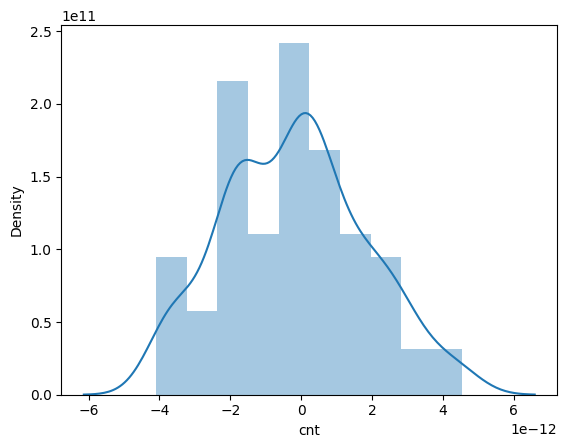

In [39]:
sns.distplot(reg_pred-y_test)

In [36]:
from sklearn.metrics import r2_score

In [40]:
score=r2_score(reg_pred,y_test)

In [41]:
score

1.0